## Visualization Of KPI Total Rents Per Hour ##

This script generates a visualization for the KPI total rents per hour. The graph contains four subplots and they show average values for hours of a day, for every month in the year, for the weekdays and for the seasons. There is an option to export the results as a PDF and PNG file.

<BarContainer object of 4 artists>

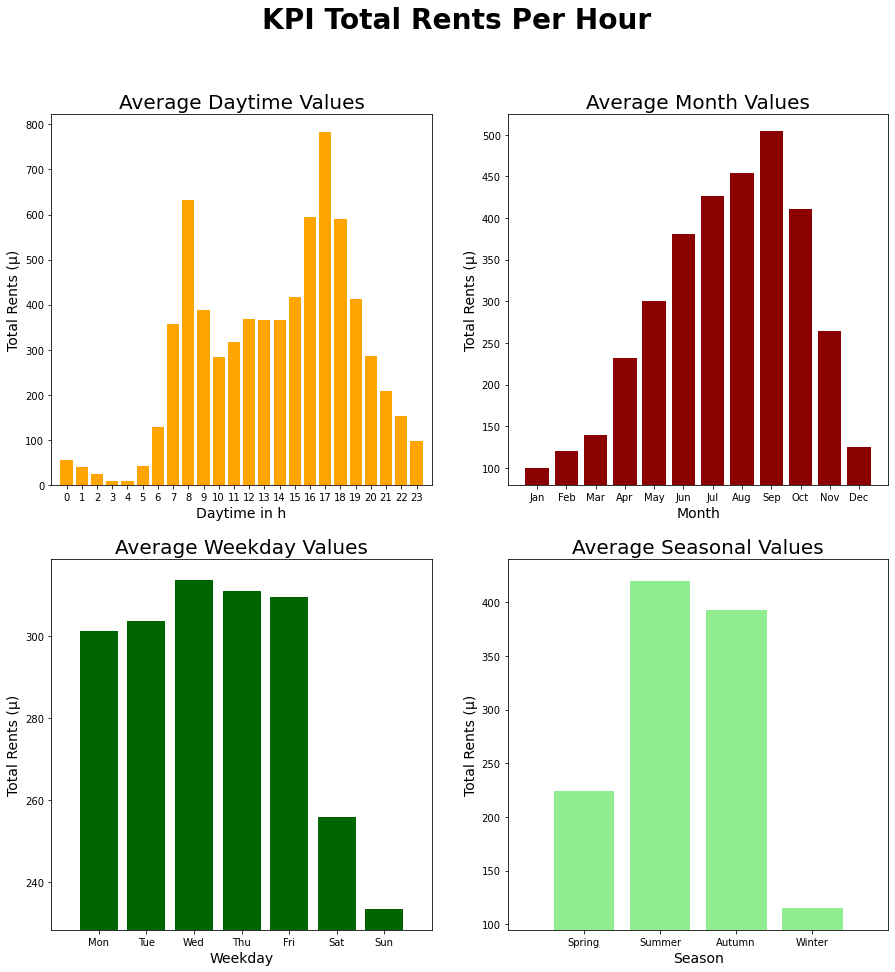

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the dataset from previous script
kpi_rents = pd.read_csv('KPI_total_rents_per_hour.csv')
kpi_rents = pd.DataFrame(kpi_rents)
times = pd.to_datetime(kpi_rents.hour)

# Generate structure of whole image
fig = plt.figure(figsize=(15, 15))
fig.suptitle("KPI Total Rents Per Hour", fontsize=28, fontweight='bold')

# Prepare the mean values for every dimension
kpi_rents_daytime = kpi_rents.groupby([times.dt.hour]).mean()
kpi_rents_month = kpi_rents.groupby([times.dt.month]).mean()
kpi_rents_weekday = kpi_rents.groupby([times.dt.weekday]).mean()
kpi_rents_season = kpi_rents_month

# To get an ovierview for the seasons in a 'good' order, values of the months are labeled with numbers:
# 0 - Spring
# 1 - Summer
# 2 - Autumn
# 3 - Winter
# After that data is grouped by the new labels and the mean is calculated
kpi_rents_season['season'] = [3, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3]
kpi_rents_season = kpi_rents_season.groupby('season').mean()

# Design of first subplot, average daytime values:
subplotDaytime = fig.add_subplot(2,2,1)
subplotDaytime.set_title('Average Daytime Values', fontsize=20)
subplotDaytime.set_ylabel('Total Rents (µ)', fontsize=14)
subplotDaytime.set_xlabel('Daytime in h', rotation = 0, fontsize=14)
subplotDaytime.set_xlim([-1,24])
ax_subplotDaytime = np.arange(0, 24)
subplotDaytime.set_xticks(ax_subplotDaytime)
subplotDaytime.bar(ax_subplotDaytime, kpi_rents_daytime['rents_count'], color='orange')

# Design of second subplot, average month values:
subplotMonth = fig.add_subplot(2,2,2)
subplotMonth.set_title('Average Month Values', fontsize=20)
subplotMonth.set_ylabel('Total Rents (µ)', fontsize=14)
subplotMonth.set_xlabel('Month', rotation = 0, fontsize=14)
subplotMonth.set_xlim([-1,12])
subplotMonth.set_ylim([min(kpi_rents_month['rents_count'])-20, max(kpi_rents_month['rents_count'])+20])
ax_subplotMonth = np.arange(0, 12)
subplotMonth.set_xticks(ax_subplotMonth)
subplotMonth.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
subplotMonth.bar(ax_subplotMonth, kpi_rents_month['rents_count'], color='darkred')

# Design of third subplot, average weekday values:
subplotWeekday = fig.add_subplot(2,2,3)
subplotWeekday.set_title('Average Weekday Values', fontsize=20)
subplotWeekday.set_ylabel('Total Rents (µ)', fontsize=14)
subplotWeekday.set_xlabel('Weekday', rotation = 0, fontsize=14)
subplotWeekday.set_xlim([-1,7])
subplotWeekday.set_ylim([min(kpi_rents_weekday['rents_count'])-5, max(kpi_rents_weekday['rents_count'])+5])
ax_subplotWeekday = np.arange(0, 7)
subplotWeekday.set_xticks(ax_subplotWeekday)
subplotWeekday.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
subplotWeekday.bar(ax_subplotWeekday, kpi_rents_weekday['rents_count'], color='darkgreen')

# Design of fourth subplot, average seasonal values:
subplotSeason = fig.add_subplot(2,2,4)
subplotSeason.set_title('Average Seasonal Values', fontsize=20)
subplotSeason.set_ylabel('Total Rents (µ)', fontsize=14)
subplotSeason.set_xlabel('Season', rotation = 0, fontsize=14)
subplotSeason.set_xlim([-1,4])
subplotSeason.set_ylim([min(kpi_rents_season['rents_count'])-20, max(kpi_rents_season['rents_count'])+20])
ax_subplotSeason = np.arange(0, 4)
subplotSeason.set_xticks(ax_subplotSeason)
subplotSeason.set_xticklabels(['Spring','Summer','Autumn','Winter'])
subplotSeason.bar(ax_subplotSeason, kpi_rents_season['rents_count'], color='lightgreen')

In [2]:
# Save the picture as PNG and PDF file
fig.savefig('KPI_Total_Rents_Per_Hour.pdf', dpi=300)
fig.savefig('KPI_Total_Rents_Per_Hour.png', dpi=300)